# Session 2 - Programming with Elastic Search

## 1 Modifying ElasticSearch index behavior

In the previous session we had to clean manually the list of words in order to compute Zipf's and Heaps' laws. 

ElasticSearch allows using a pipeline of processes that allows to clean the text that is indexed discarding anything not useful.

We are going to work with three of the usual processes:

* Tokenization
* Normalization
* Token filtering (stopwords and stemming)

The next cells allow configuring the default tokenizer for an index and analyze an example text. We are going to play a little bit with the possibilities and see what tokens result from the analysis.


In [1]:
from elasticsearch import Elasticsearch
from elasticsearch_dsl import Index, analyzer, tokenizer

client = Elasticsearch()

## Token Whitespace filter lowercase

In [22]:
# Index analyzer cofiguration
# Change the configuration and run this cell and the next to see the changes

# Tokenizers: whitespace, standard, classic, letter
# Filters: lowercase, asciifolding, stop, porter_stem, kstem, snowball
my_analyzer = analyzer('default',
    type='custom',
    tokenizer=tokenizer('whitespace'),
    filter=['lowercase']
)
   
ind = Index('news', using=client)
ind.close()
ind.analyzer(my_analyzer)    
ind.save()
ind.open()

{'acknowledged': True, 'shards_acknowledged': True}

Now you can ask the index to analyze any text, feel free to change the text

In [23]:
res = ind.analyze(body={'analyzer':'default', 'text':u'my taylor 4ís was% &printing printed rich the.'})
for r in res['tokens']:
    print(r)

{'token': 'my', 'start_offset': 0, 'end_offset': 2, 'type': 'word', 'position': 0}
{'token': 'taylor', 'start_offset': 3, 'end_offset': 9, 'type': 'word', 'position': 1}
{'token': '4ís', 'start_offset': 10, 'end_offset': 13, 'type': 'word', 'position': 2}
{'token': 'was%', 'start_offset': 14, 'end_offset': 18, 'type': 'word', 'position': 3}
{'token': '&printing', 'start_offset': 19, 'end_offset': 28, 'type': 'word', 'position': 4}
{'token': 'printed', 'start_offset': 29, 'end_offset': 36, 'type': 'word', 'position': 5}
{'token': 'rich', 'start_offset': 37, 'end_offset': 41, 'type': 'word', 'position': 6}
{'token': 'the.', 'start_offset': 42, 'end_offset': 46, 'type': 'word', 'position': 7}


## Token Standard

In [10]:
# Index analyzer cofiguration
# Change the configuration and run this cell and the next to see the changes

# Tokenizers: whitespace, standard, classic, letter
# Filters: lowercase, asciifolding, stop, porter_stem, kstem, snowball
my_analyzer = analyzer('default',
    type='custom',
    tokenizer=tokenizer('standard'),
    filter=['lowercase']
)
   
ind = Index('news', using=client)
ind.close()
ind.analyzer(my_analyzer)    
ind.save()
ind.open()

{'acknowledged': True, 'shards_acknowledged': True}

Now you can ask the index to analyze any text, feel free to change the text

In [13]:
res = ind.analyze(body={'analyzer':'default', 'text':u'my taylor 4ís was% &printing printed rich the.'})
for r in res['tokens']:
    print(r)

{'token': 'my', 'start_offset': 0, 'end_offset': 2, 'type': '<ALPHANUM>', 'position': 0}
{'token': 'taylor', 'start_offset': 3, 'end_offset': 9, 'type': '<ALPHANUM>', 'position': 1}
{'token': '4ís', 'start_offset': 10, 'end_offset': 13, 'type': '<ALPHANUM>', 'position': 2}
{'token': 'was', 'start_offset': 14, 'end_offset': 17, 'type': '<ALPHANUM>', 'position': 3}
{'token': 'printing', 'start_offset': 20, 'end_offset': 28, 'type': '<ALPHANUM>', 'position': 4}
{'token': 'printed', 'start_offset': 29, 'end_offset': 36, 'type': '<ALPHANUM>', 'position': 5}
{'token': 'rich', 'start_offset': 37, 'end_offset': 41, 'type': '<ALPHANUM>', 'position': 6}
{'token': 'the', 'start_offset': 42, 'end_offset': 45, 'type': '<ALPHANUM>', 'position': 7}


## Token Letter

In [14]:
# Index analyzer cofiguration
# Change the configuration and run this cell and the next to see the changes

# Tokenizers: whitespace, standard, classic, letter
# Filters: lowercase, asciifolding, stop, porter_stem, kstem, snowball
my_analyzer = analyzer('default',
    type='custom',
    tokenizer=tokenizer('letter'),
    filter=['lowercase']
)
   
ind = Index('news', using=client)
ind.close()
ind.analyzer(my_analyzer)    
ind.save()
ind.open()

{'acknowledged': True, 'shards_acknowledged': True}

Now you can ask the index to analyze any text, feel free to change the text

In [15]:
res = ind.analyze(body={'analyzer':'default', 'text':u'my taylor 4ís was% &printing printed rich the.'})
for r in res['tokens']:
    print(r)

{'token': 'my', 'start_offset': 0, 'end_offset': 2, 'type': 'word', 'position': 0}
{'token': 'taylor', 'start_offset': 3, 'end_offset': 9, 'type': 'word', 'position': 1}
{'token': 'ís', 'start_offset': 11, 'end_offset': 13, 'type': 'word', 'position': 2}
{'token': 'was', 'start_offset': 14, 'end_offset': 17, 'type': 'word', 'position': 3}
{'token': 'printing', 'start_offset': 20, 'end_offset': 28, 'type': 'word', 'position': 4}
{'token': 'printed', 'start_offset': 29, 'end_offset': 36, 'type': 'word', 'position': 5}
{'token': 'rich', 'start_offset': 37, 'end_offset': 41, 'type': 'word', 'position': 6}
{'token': 'the', 'start_offset': 42, 'end_offset': 45, 'type': 'word', 'position': 7}


## Filter asciifolding

In [16]:
# Index analyzer cofiguration
# Change the configuration and run this cell and the next to see the changes

# Tokenizers: whitespace, standard, classic, letter
# Filters: lowercase, asciifolding, stop, porter_stem, kstem, snowball
my_analyzer = analyzer('default',
    type='custom',
    tokenizer=tokenizer('letter'),
    filter=['lowercase','asciifolding']
)
   
ind = Index('news', using=client)
ind.close()
ind.analyzer(my_analyzer)    
ind.save()
ind.open()

{'acknowledged': True, 'shards_acknowledged': True}

Now you can ask the index to analyze any text, feel free to change the text

In [17]:
res = ind.analyze(body={'analyzer':'default', 'text':u'my taylor 4ís was% &printing printed rich the.'})
for r in res['tokens']:
    print(r)

{'token': 'my', 'start_offset': 0, 'end_offset': 2, 'type': 'word', 'position': 0}
{'token': 'taylor', 'start_offset': 3, 'end_offset': 9, 'type': 'word', 'position': 1}
{'token': 'is', 'start_offset': 11, 'end_offset': 13, 'type': 'word', 'position': 2}
{'token': 'was', 'start_offset': 14, 'end_offset': 17, 'type': 'word', 'position': 3}
{'token': 'printing', 'start_offset': 20, 'end_offset': 28, 'type': 'word', 'position': 4}
{'token': 'printed', 'start_offset': 29, 'end_offset': 36, 'type': 'word', 'position': 5}
{'token': 'rich', 'start_offset': 37, 'end_offset': 41, 'type': 'word', 'position': 6}
{'token': 'the', 'start_offset': 42, 'end_offset': 45, 'type': 'word', 'position': 7}


## filter asciifolding + stop

In [18]:
# Index analyzer cofiguration
# Change the configuration and run this cell and the next to see the changes

# Tokenizers: whitespace, standard, classic, letter
# Filters: lowercase, asciifolding, stop, porter_stem, kstem, snowball
my_analyzer = analyzer('default',
    type='custom',
    tokenizer=tokenizer('letter'),
    filter=['lowercase','asciifolding', 'stop']
)
   
ind = Index('news', using=client)
ind.close()
ind.analyzer(my_analyzer)    
ind.save()
ind.open()

{'acknowledged': True, 'shards_acknowledged': True}

Now you can ask the index to analyze any text, feel free to change the text

In [19]:
res = ind.analyze(body={'analyzer':'default', 'text':u'my taylor 4ís was% &printing printed rich the.'})
for r in res['tokens']:
    print(r)

{'token': 'my', 'start_offset': 0, 'end_offset': 2, 'type': 'word', 'position': 0}
{'token': 'taylor', 'start_offset': 3, 'end_offset': 9, 'type': 'word', 'position': 1}
{'token': 'printing', 'start_offset': 20, 'end_offset': 28, 'type': 'word', 'position': 4}
{'token': 'printed', 'start_offset': 29, 'end_offset': 36, 'type': 'word', 'position': 5}
{'token': 'rich', 'start_offset': 37, 'end_offset': 41, 'type': 'word', 'position': 6}


## Filter asciifolding + stop + snowball

In [20]:
# Index analyzer cofiguration
# Change the configuration and run this cell and the next to see the changes

# Tokenizers: whitespace, standard, classic, letter
# Filters: lowercase, asciifolding, stop, porter_stem, kstem, snowball
my_analyzer = analyzer('default',
    type='custom',
    tokenizer=tokenizer('letter'),
    filter=['lowercase','asciifolding','stop', 'snowball']
)
   
ind = Index('news', using=client)
ind.close()
ind.analyzer(my_analyzer)    
ind.save()
ind.open()

{'acknowledged': True, 'shards_acknowledged': True}

Now you can ask the index to analyze any text, feel free to change the text

In [21]:
res = ind.analyze(body={'analyzer':'default', 'text':u'my taylor 4ís was% &printing printed rich the.'})
for r in res['tokens']:
    print(r)

{'token': 'my', 'start_offset': 0, 'end_offset': 2, 'type': 'word', 'position': 0}
{'token': 'taylor', 'start_offset': 3, 'end_offset': 9, 'type': 'word', 'position': 1}
{'token': 'print', 'start_offset': 20, 'end_offset': 28, 'type': 'word', 'position': 4}
{'token': 'print', 'start_offset': 29, 'end_offset': 36, 'type': 'word', 'position': 5}
{'token': 'rich', 'start_offset': 37, 'end_offset': 41, 'type': 'word', 'position': 6}


Now **follow the instructions** of the documentation, index the documents from the previous session using the script 'IndexFilesPreprocess.py' and use the script 'CountWords.py' from the previous session to see how the set of tokens change.

***

## 2 The index reloaded

You can use the modified indexer ```IndexFilesPreprocess.py``` script to play with the different possibilities for the preprocessing pipeline.

You can change the **tokenizer** and apply different processes to the tokens like lowercasing, asccii folding, removing stopwords and different stemming algorithms.

***

## 3 Computing Tf-Idf and Cosine similarity

Now is your turn to work in the session task.

The idea is to program a script that given two document paths obtains their ids, computes the Tf-Idf representation of the documents and then computes and prints their cosine similarity

**Follow the instructions** in the documentation and and **pay attention** to the documentation that you have to deliver for this session.

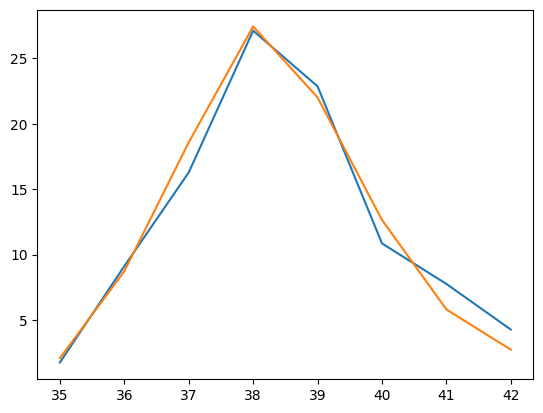

In [1]:
import matplotlib.pyplot as plt 

x = [35,36,37,38,39,40,41,42]
y_compra = [2.00,11.80,21.90,26.50,21.50,10.00,5.00,1.30]
y_venta = [1.74,9.11,16.28,27.13,	22.87,	10.85, 7.75,4.26]
y_lynx = [2.07, 8.72, 18.58, 27.45, 22.02, 12.65,5.8,2.72]

plt.plot(x,y_venta)
plt.plot(x,y_compra)
plt.plot(x,y_lynx)
plt.legend()
plt.show()